In [ ]:
import torch
import torch.nn as nn

linear = nn.Linear(10,2)
print('linear',linear)

input = torch.randn(3,10)
print('\ninput',input)

output = linear(input)
print('\noutput',output)

relu = nn.ReLU()
relu_output = relu(output)
print('\nrelu_output',relu_output)

linear Linear(in_features=10, out_features=2, bias=True)

input tensor([[-0.6031,  0.4518, -0.5165, -0.1217, -1.5608,  3.2706, -0.5435,  1.3274,
          0.6965, -0.5175],
        [-0.1189,  1.2913, -0.4178,  0.8832,  0.0215, -0.0646, -0.3611,  1.1056,
         -0.9953, -1.3836],
        [-0.6622, -1.2581, -0.4652,  0.3521,  1.0630, -0.3069,  0.5070, -0.2159,
          0.0068,  1.3317]])

output tensor([[ 0.7848,  1.1761],
        [ 1.0977, -0.3362],
        [-0.4511, -0.0053]], grad_fn=<AddmmBackward0>)

relu_output tensor([[0.7848, 1.1761],
        [1.0977, 0.0000],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)


# Neural Net on the XOR dataset

#### Reference:
#### https://medium.com/mlearning-ai/learning-xor-with-pytorch-c1c11d67ba8e
#### https://en.wikipedia.org/wiki/Activation_function

In [ ]:
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [ ]:
X = torch.Tensor([[0,0],[0,1], [1,0], [1,1]])
Y = torch.Tensor([0,1,1,0]).view(-1,1)

In [ ]:
class clsXOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(clsXOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 2)
        self.lin2 = nn.Linear(2, output_dim)
    
    def forward(self, x):
        x = self.lin1(x)
        x = F.sigmoid(x)
        x = self.lin2(x)
        return x

In [ ]:
# def weights_init(model):
#     for m in model.modules():
#         if isinstance(m, nn.Linear):
#             # initialize the weight tensor, here we use a normal distribution
#             m.weight.data.normal_(0, 1)

# weights_init(model)

In [ ]:
model = clsXOR()

In [ ]:
loss_func = nn.MSELoss()

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)

In [ ]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        #y_hat = model(x_var)
        y_hat = model.forward(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 500 == 0:
        print("Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch: 0, Loss: 0.019089970737695694, 
Epoch: 500, Loss: 0.04357881844043732, 
Epoch: 1000, Loss: 1.4210854715202004e-14, 
Epoch: 1500, Loss: 0.0, 
Epoch: 2000, Loss: 0.0, 


In [ ]:
model_params = list(model.parameters())

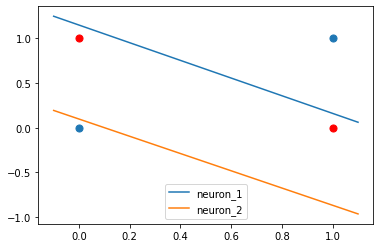

In [ ]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])

plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()